In [1]:
%matplotlib inline

In [2]:
#from __future__ import division
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
!ls -lah ../data/*csv

-rw-rw-r-- 1 ilya ilya 1.6K Apr 19 11:05 ../data/2017-03-09_NextSeq.csv
-rw-rw-r-- 1 ilya ilya 457K Oct 26  2016 ../data/dfa_mp.offset_150.win_100.csv
-rw-rw-r-- 1 ilya ilya 461K Oct 26  2016 ../data/dfa_mp.offset_150.win_200.csv
-rw-rw-r-- 1 ilya ilya 453K Oct 26  2016 ../data/dfa_mp.offset_150.win_50.csv
-rw-rw-r-- 1 ilya ilya 455K Oct 26  2016 ../data/dfa_mp.offset_150.win_80.csv
-rw-rw-r-- 1 ilya ilya 457K Oct 26  2016 ../data/dfa_mp.offset_200.win_100.csv
-rw-rw-r-- 1 ilya ilya 461K Oct 26  2016 ../data/dfa_mp.offset_200.win_200.csv
-rw-rw-r-- 1 ilya ilya 454K Oct 26  2016 ../data/dfa_mp.offset_200.win_50.csv
-rw-rw-r-- 1 ilya ilya 456K Oct 26  2016 ../data/dfa_mp.offset_200.win_80.csv
-rw-rw-r-- 1 ilya ilya 457K Oct 26  2016 ../data/dfa_mp.offset_300.win_100.csv
-rw-rw-r-- 1 ilya ilya 461K Oct 26  2016 ../data/dfa_mp.offset_300.win_200.csv
-rw-rw-r-- 1 ilya ilya 454K Oct 26  2016 ../data/dfa_mp.offset_300.win_50.csv
-rw-rw-r-- 1 ilya ilya 455K Oct 26  2016 ../data/dfa_mp.offset_3

## Load the data

In [4]:
offsets = [150,200,300]
winsizes = [50,80,100,200]
output_tpl = '../data/dfa_mp.offset_{}.win_{}.csv'

output = []

for offset in offsets:
    for winsize in winsizes:
        df = pd.DataFrame.from_csv(output_tpl.format(offset, winsize))
        df['win'] = winsize
        df['offset'] = offset
        output.append(df)
        
dfa = pd.concat(output)

In [5]:
dfa['UTR_length'] = dfa['end_x'] - dfa['start_x']
dfa

,TSS,end_x,start_x,gene,strand_x,end_y,start_y,strand_y,strand,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset,UTR_length
0,148,190,148,thrL,+,255.0,190.0,+,+,3.000000,2.784355,0.911828,3.178117,50,150,42
1,148,190,148,thrL,+,255.0,190.0,+,+,3.000000,2.784355,0.911828,3.178117,50,150,42
2,5030,5234,5030,yaaX,+,5530.0,5234.0,+,+,4.576923,6.983333,1.264901,1.436242,50,150,204
3,6587,6587,6459,yaaA,-,6459.0,5683.0,-,-,0.032028,0.072193,0.567568,0.600000,50,150,128
4,6615,6615,6459,yaaA,-,6459.0,5683.0,-,-,0.034091,0.090379,0.654135,0.582011,50,150,156
5,8017,8017,7959,yaaJ,-,7959.0,6529.0,-,-,0.875000,0.571429,0.885246,1.196262,50,150,58
6,8191,8238,8191,talB,+,9191.0,8238.0,+,+,0.478825,0.513356,0.473950,0.564393,50,150,47
9,11542,11542,11356,yaaW,-,11356.0,10643.0,-,-,0.666667,1.777778,1.327273,1.012658,50,150,186
10,11825,11825,11786,yaaI,-,11786.0,11382.0,-,-,0.500000,2.625000,0.652330,0.474874,50,150,39
11,11913,11913,11786,yaaI,-,11786.0,11382.0,-,-,0.333333,0.555556,1.748148,1.713376,50,150,127


## Let's see how it looks like for one particular `window` and `offset` value

In [6]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['ratio_ATCACG'] > 2)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['UTR_length', 'ratio_ATCACG','ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])


/home/ilya/.venv/pydata3/lib/python3.5/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


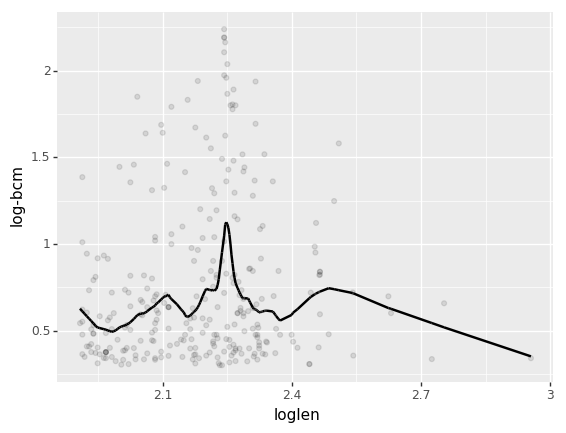

<ggplot: (8770817038077)>


In [7]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='lowess', span=1/7.)
print(p)

/home/ilya/.venv/pydata3/lib/python3.5/site-packages/plotnine/stats/stat_smooth.py:167: UserWarning: No 'window' specified in the method_args. Using window = 29. The same window is used for all groups or facets
  "facets".format(window))


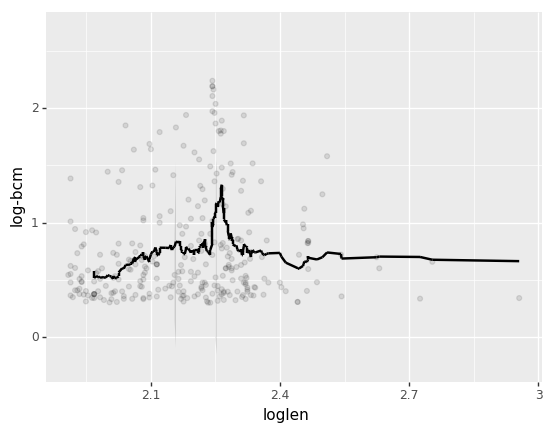

<ggplot: (-9223363266037642885)>


In [11]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='mavg')
print(p)

/home/ilya/.venv/pydata3/lib/python3.5/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


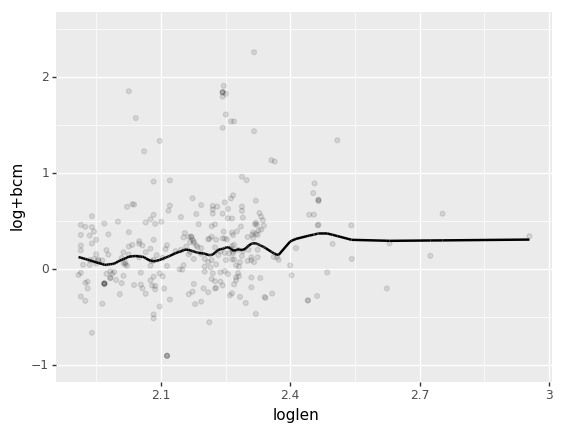

<ggplot: (8770817089544)>


In [12]:
p = ggplot(d, aes(x='loglen', y='log+bcm')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='lowess', span=1/5.) \
        + scale_y_continuous(limits=(-1,2.5))
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).mean()
  y = pd.rolling_mean(y, window)


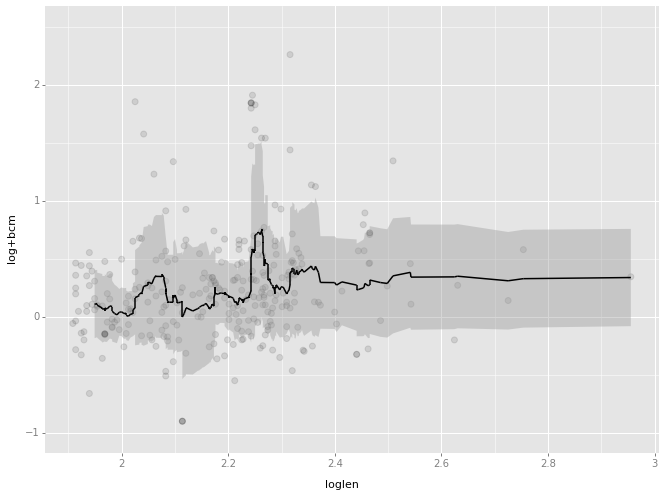

<ggplot: (-9223363247313110570)>


In [12]:
p = ggplot(d, aes(x='loglen', y='log+bcm')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='ma', window=25) \
        + scale_y_continuous(limits=(-1,2.5))
print(p)

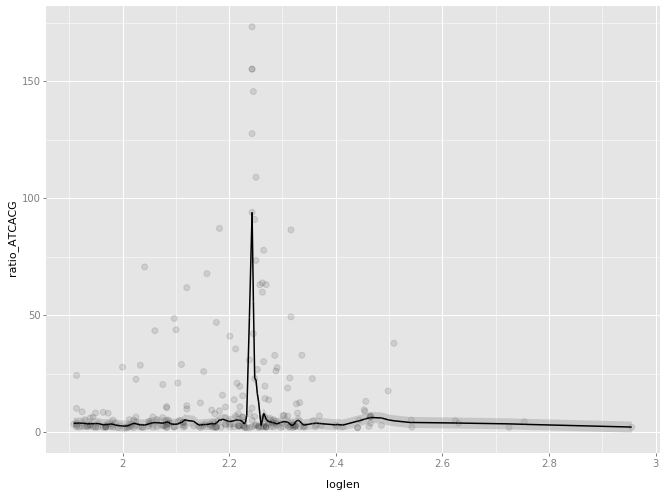

<ggplot: (8789541660943)>


In [13]:
p = ggplot(d, aes(x='loglen', y='ratio_ATCACG')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='lowess', span=1/17.)
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  y = pd.rolling_mean(y, window)


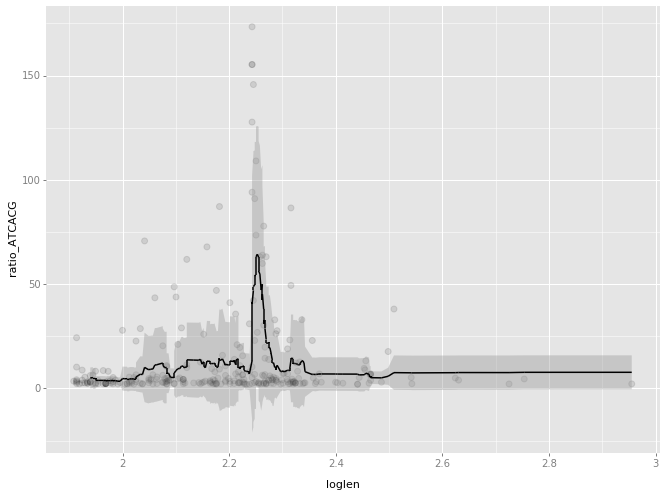

<ggplot: (8789541625955)>


In [14]:
p = ggplot(d, aes(x='loglen', y='ratio_ATCACG')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='ma', window=20)
print(p)

## What about other `offset` and `win` values?

In [15]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['ratio_ATCACG'] > 2)][[
            'TSS', 'gene', 'UTR_length', 
            'ratio_ATCACG','ratio_CGATGT', 'offset', 'win']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])


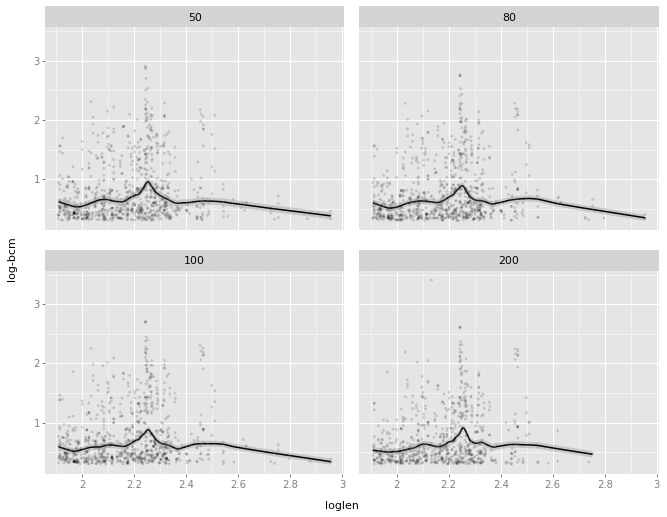

<ggplot: (-9223363247254408255)>


In [16]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1, size=1) \
        + geom_smooth(method='lowess', span=1/5.) \
        + facet_wrap('win')
print(p)

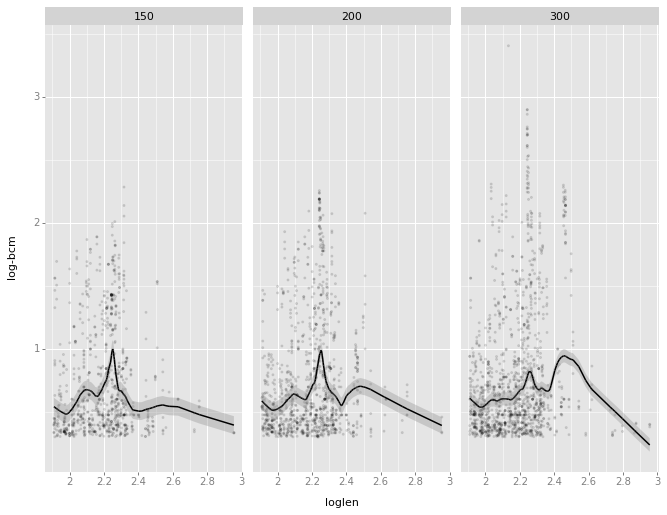

<ggplot: (-9223363247311318805)>


In [17]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1, size=1) \
        + geom_smooth(method='lowess', span=1/5.) \
        + facet_wrap('offset')
print(p)

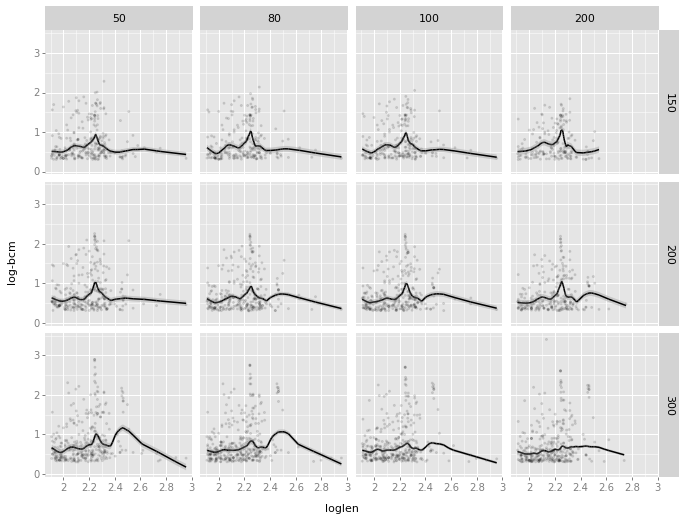

<ggplot: (-9223363247333806669)>


In [18]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1, size=1) \
        + geom_smooth(method='lowess', span=1/5.) \
        + facet_grid('offset ~ win')
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  y = pd.rolling_mean(y, window)


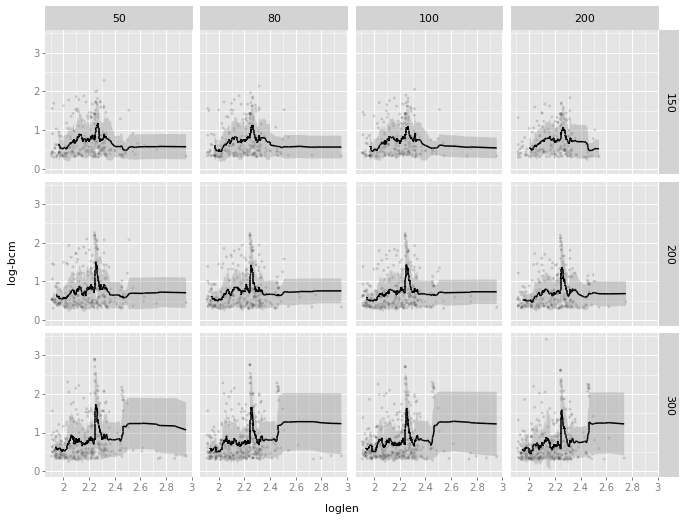

<ggplot: (8789541669475)>


In [19]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1, size=1) \
        + geom_smooth(method='ma', window=20) \
        + facet_grid('offset ~ win')
print(p)

## Long UTRs

In [20]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['UTR_length'] < 600)
        & (dfa['ratio_ATCACG'] > 2)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['TSS', 'gene', 'UTR_length', 'ratio_ATCACG','ratio_CGATGT']].copy()
d['log-bcm'] = np.log2(d['ratio_ATCACG'])
d['log+bcm'] = np.log2(d['ratio_CGATGT'])
d['loglen'] = np.log2(d['UTR_length'])
d['diff'] = d['log-bcm'] - d['log+bcm']

d1 = d[['UTR_length', 'loglen', 'log-bcm']].rename(columns={'log-bcm': 'logratio'})
d1['bcm'] = '-'
d2 = d[['UTR_length', 'loglen', 'log+bcm']].rename(columns={'log+bcm': 'logratio'})
d2['bcm'] = '+'

_d = pd.concat([d1, d2])

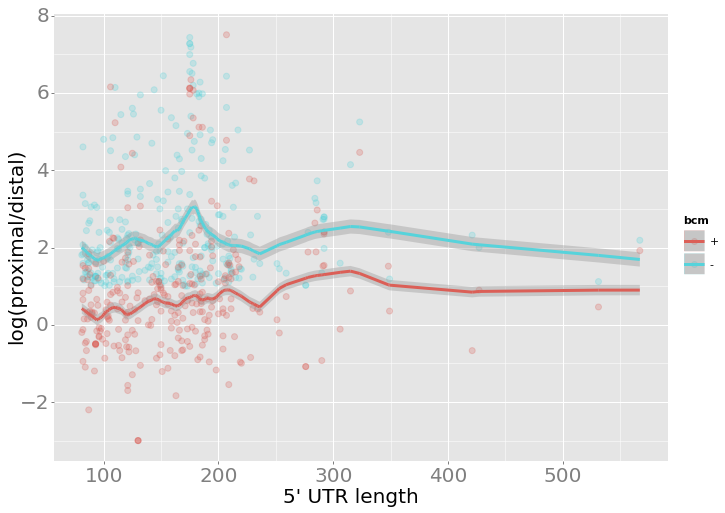

<ggplot: (-9223363247311214462)>


In [21]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='lowess', span=1/5., size=3) \
        + xlab("5' UTR length") \
        + ylab("log(proximal/distal)") \
        + theme(axis_title=element_text(size=20),
                axis_text=element_text(size=20))
print(p)

In [22]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['UTR_length'] < 600)
        & (dfa['ratio_ATCACG'] > 2)][['TSS', 'win', 'offset', 'gene', 'UTR_length', 'ratio_ATCACG','ratio_CGATGT']].copy()
d['log-bcm'] = np.log2(d['ratio_ATCACG'])
d['log+bcm'] = np.log2(d['ratio_CGATGT'])
d['loglen'] = np.log2(d['UTR_length'])

d1 = d[['UTR_length', 'win', 'offset', 'loglen', 'log-bcm']].rename(columns={'log-bcm': 'logratio'})
d1['bcm'] = '-'
d2 = d[['UTR_length', 'win', 'offset', 'loglen', 'log+bcm']].rename(columns={'log+bcm': 'logratio'})
d2['bcm'] = '+'

_d = pd.concat([d1, d2])

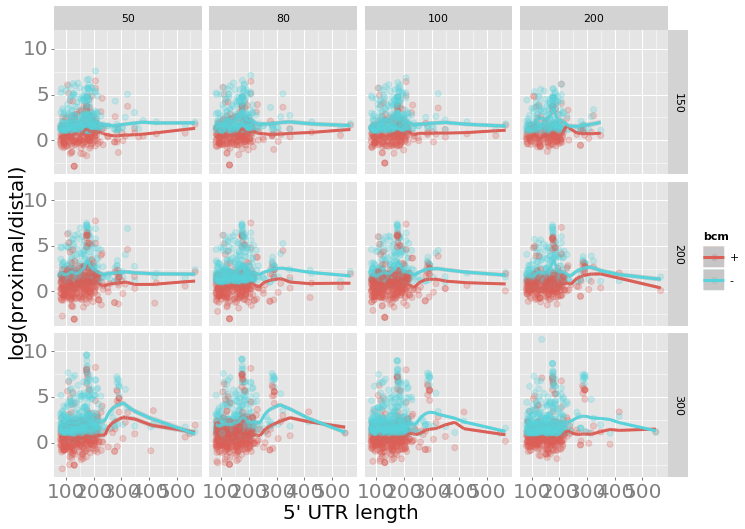

<ggplot: (8789543465003)>


In [23]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='lowess', span=1/5., size=3) \
        + xlab("5' UTR length") \
        + ylab("log(proximal/distal)") \
        + theme(axis_title=element_text(size=20),
                axis_text=element_text(size=20)) \
        + facet_grid('offset ~ win')
print(p)